In [1]:
import oritelib as orite
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

In [2]:
fasta = orite.seq_from_fasta("test_data/GCF_000009045.1_ASM904v1_genomic.fna")

In [3]:
len(fasta)

4215606

In [4]:
f0 = fasta
f1 = fasta[500000:]+fasta[0:500000]
f2 = fasta[1000000:]+fasta[0:1000000]
f3 = fasta[2000000:]+fasta[0:2000000]



In [5]:
f0_skew = orite.gc_skew_sliding_window(f0, 300000)
f1_skew = orite.gc_skew_sliding_window(f1, 300000)
f2_skew = orite.gc_skew_sliding_window(f2, 300000)
f3_skew = orite.gc_skew_sliding_window(f3, 300000)


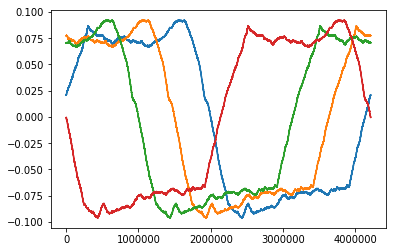

In [6]:
plt.plot(f0_skew[0])
plt.plot(f1_skew[0])
plt.plot(f2_skew[0])
plt.plot(f3_skew[0])


In [7]:
def skew_from_max(f, window_radius = 50000):
    
    initial_pos_index = list(range(len(f)))
    
    
    # Inital gc skew calc on original unrotaed sequence and find 
    # position at max CG skew value.
    gc, cgc = orite.gc_skew_sliding_window(f, window_rad=window_radius)
    max_indx = np.argmax(gc)
    print('inital max gc skew indx', max_indx)
    
    
    # Rotade sequence to begin at max cg-skew value and index.
    new = f[max_indx:] + f[0:max_indx] 
    new_pos_index = initial_pos_index[max_indx:] + initial_pos_index[0:max_indx]
    
    
    # Calc cg-skew for rotated sequence and find position at max cumilative CG skew value. 
    new_gc, new_cgc = orite.gc_skew_sliding_window(new, window_rad=window_radius)
    cGC_max_indx = np.argmax(new_cgc)
    print('max cgc skew indx', cGC_max_indx)
    
    
    # Final rotation of sequence and final gc calc results
    final = new[cGC_max_indx:] + new[0:cGC_max_indx] 
    final_pos_index = new_pos_index[cGC_max_indx:]+new_pos_index[0:cGC_max_indx]
    
    
    final_gc, final_cgc = orite.gc_skew_sliding_window(final, window_rad=window_radius)
    
    
    # Return sequence rotated to max 
    max_rotated_fasta = final
    
    max_cCG_indx_original_offset = (max_indx + cGC_max_indx)% len(fasta)
    
    return final_gc, final_cgc, max_rotated_fasta, max_cCG_indx_original_offset
    

In [22]:
x0 = skew_from_max(f0, window_radius=250000)


inital max gc skew indx 1692757
max cgc skew indx 272087


In [23]:
double_rot = f0[x0[3]:]+f0[0:x0[3]]


print(f0[0:20])
print(x0[2][0:20])
print(double_rot[0:20])


gc, cgc = orite.gc_skew_sliding_window(double_rot, window_rad=250000)
o_gc, o_cgc = orite.gc_skew_sliding_window(f0, window_rad=250000)


ATCTTTTTCGGCTTTTTTTA
TTCCATCGATTTGATCAAAA
TTCCATCGATTTGATCAAAA


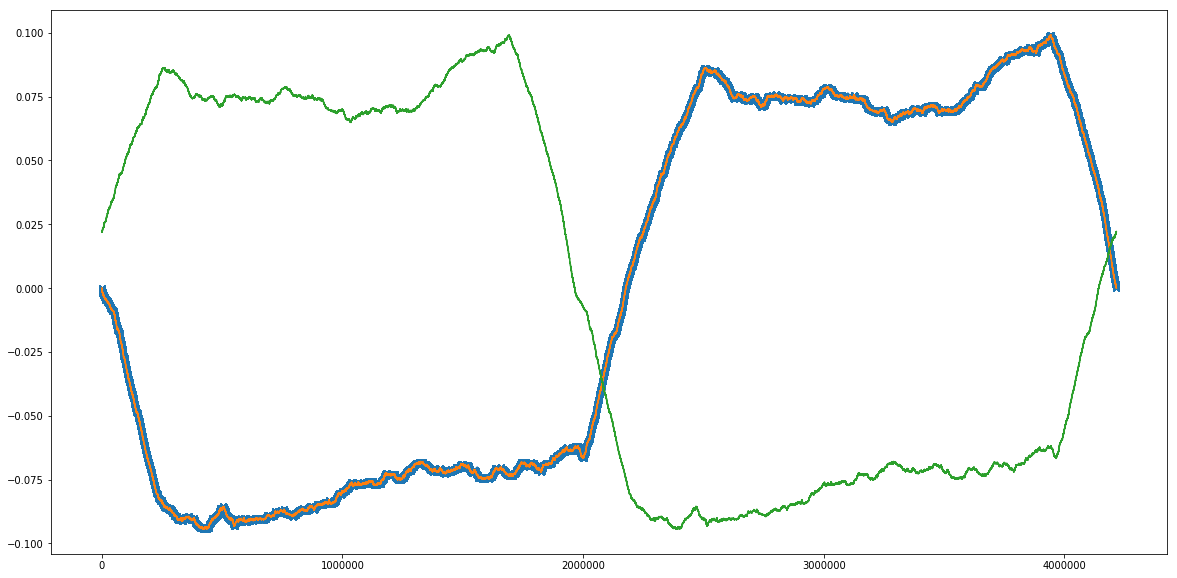

In [24]:
plt.figure(figsize=[20,10])
plt.plot(x0[0], 'x')
plt.plot(gc)
plt.plot(o_gc)


In [25]:
# If modulus calc is correct rotating by max_cCG_indx_absolute
# should give back the same gc skew calc

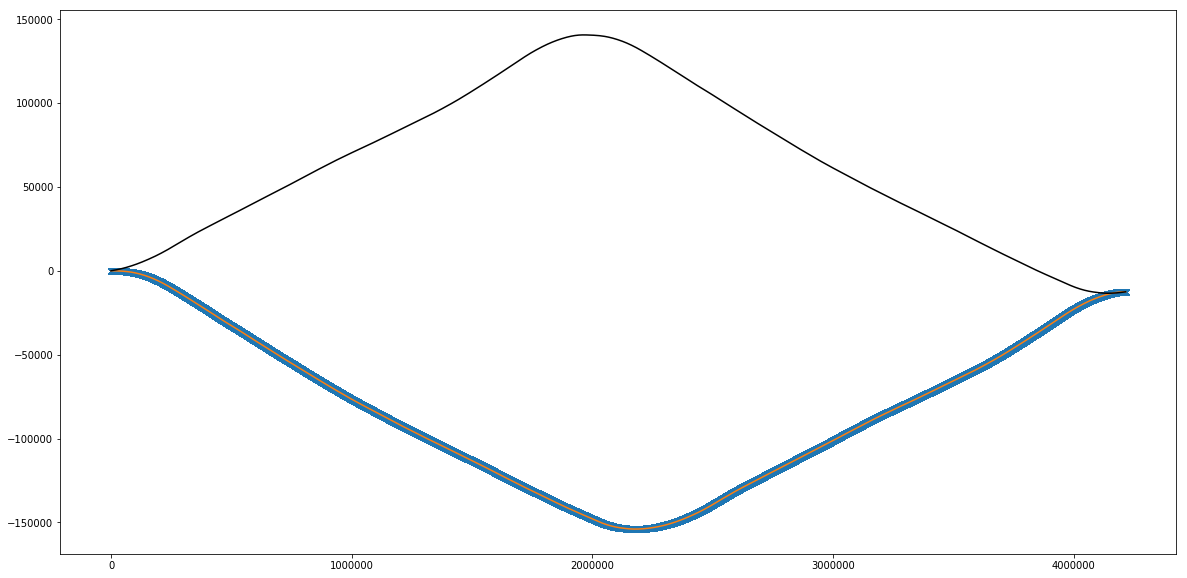

In [26]:
plt.figure(figsize=[20,10])
plt.plot(x0[1], 'x')
plt.plot(cgc)
plt.plot(o_cgc, 'k')


In [27]:

#def transform_positions_by_offset( )

In [28]:
s_0 = orite.smooth_curve(x0[0], smoothing_param=1000)


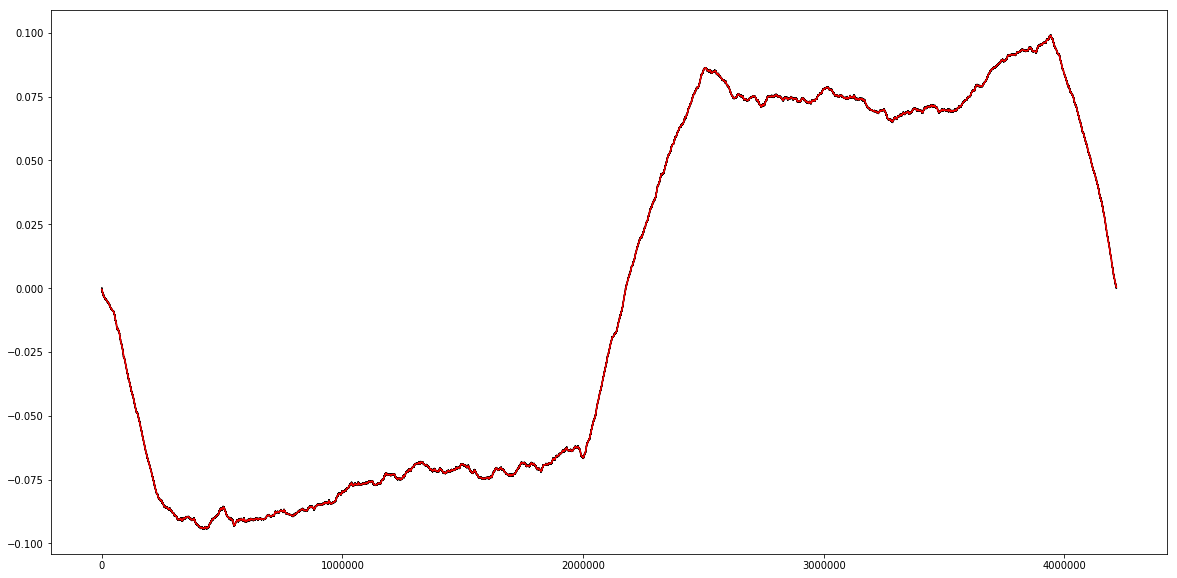

In [29]:
plt.figure(figsize=[20,10])

plt.plot(x0[0], 'k')
plt.plot(s_0, 'r')
